# 

# Ch. 9 - Expressive Timing

This notebook demonstrates expressive timing profiles from real
performances from <https://github.com/fosfrancesco/asap-dataset>.

## Load libraries

In [ ]:
library(ggplot2, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(dplyr, quietly = TRUE)

## Get data from ASAP project

This gets the metadata from ASAP project (see Foscarin et al., 2020) and
selects Preludes op 23.4.

``` r
d <- read.csv("https://raw.githubusercontent.com/fosfrancesco/asap-dataset/master/metadata.csv",header = TRUE,sep = ',')
df<-dplyr::filter(d,title=='Preludes_op_23_4')
df<-df[1:3,]
print(knitr::kable(head(df[,1:3],3)))
```

| composer     | title            | folder                        |
|:-------------|:-----------------|:------------------------------|
| Rachmaninoff | Preludes_op_23_4 | Rachmaninoff/Preludes_op_23/4 |
| Rachmaninoff | Preludes_op_23_4 | Rachmaninoff/Preludes_op_23/4 |
| Rachmaninoff | Preludes_op_23_4 | Rachmaninoff/Preludes_op_23/4 |

## Read score annotations

``` r
basedir <-'https://raw.githubusercontent.com/tuomaseerola/emr/master/'
deadpan <- read.csv(paste0(basedir,'data/midi_score_annotations.txt'),header = FALSE, sep = '\t')
print(knitr::kable(head(deadpan,3)))
```

|  V1 |  V2 | V3       |
|----:|----:|:---------|
| 0.0 | 0.0 | db,3/4,2 |
| 1.2 | 1.2 | b        |
| 2.4 | 2.4 | b        |

``` r
fn <- NULL
fn[1]<-'data/ChenGuang12M_annotations.txt'
fn[2]<-'data/MorozovS09_annotations.txt'
fn[3]<-'data/WuuE07M_annotations.txt'
Performer <- c('Chen Guang','Yevgeny Morozov','Elliot Wuu')
```

## Choose extract from all performers

``` r
D <- NULL
for (k in 1:length(fn)) {
  perf<-read.csv(paste0(basedir,fn[k]),header=F,sep='\t')
  DF<-data.frame(score=deadpan$V1,perf=perf$V1,
    annotation=deadpan$V3)
  DF <- dplyr::filter(DF,score < 30) # Limit to first 10 bars = 3*10 beats
  DF2 <- normperf(DF)                # Defined previouslys
  DF2$Performer<-Performer[k]
  D<-rbind(D,DF2)
}

options(encoding = "UTF-8")
#library(dplyr)
DF <- dplyr::filter(D,score < 30) # First 10 bars = 3*10 beats
print(knitr::kable(head(DF[,1:6],3)))
```

| score |     perf | annotation |   perf_N |     delta |    delta2 |
|------:|---------:|:-----------|---------:|----------:|----------:|
|   0.0 | 0.000000 | db,3/4,2   | 0.000000 | 0.0000000 |   0.00000 |
|   1.2 | 1.916667 | b          | 1.935339 | 0.7353393 | 735.33933 |
|   2.4 | 3.009115 | b          | 3.038430 | 0.6384300 | -96.90928 |

## Plot expressive timing deviations

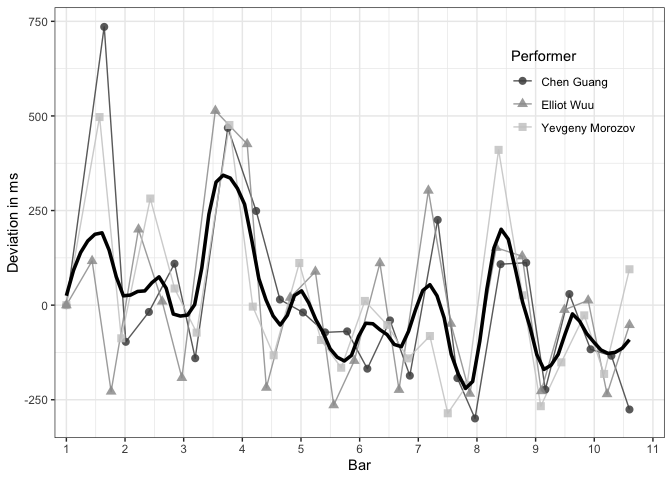

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 5)
g1 <- ggplot(DF,aes(x=perf_N,y=scoredelta_rawperf_Ndelta,colour=Performer,shape=Performer))+
  geom_line(alpha=0.85)+
  geom_point(alpha=0.85,size=2.5)+
  scale_color_grey(start = 0.30,end = 0.8)+
  geom_smooth(aes(colour = NULL,shape=NULL), method = "loess", span=0.2,se=FALSE,colour='black',linewidth=1.25)+
  scale_x_continuous(limits=c(0,30),breaks = seq(0,30,by=3),expand = c(0.02,0.002),labels=(seq(0,30,by=3)/3)+1) +
  xlab('Bar')+
  ylab('Deviation in ms')+
  theme_bw()+
  theme(legend.position=c(.85, .80))+
  theme(legend.background = element_blank()) +  # Remove overall border
  theme(legend.key = element_blank())
print(g1)

## References

-   Foscarin, F., Mcleod, A., Rigaux, P., Jacquemard, F., & Sakai, M.
    (2020). ASAP: a dataset of aligned scores and performances for piano
    transcription. In *International Society for Music Information
    Retrieval Conference* (pp. 534-541).